# Data structure and Algo in Pythonic code

## 1. Graph

### 1.1. DFS (Depth First Search)

#### DFS

In [1]:
def dfs(graph, start, path=[]):
    """
    Assuming the graph is as below (for visualization using networkx, refer to the part 2 of this Jupyter Notebook):
        A
      /   \
      B--D--C
       \ | /
         E
    
    graph = {'A':['B','C'],'B':['D','E'],'C':['D','E'],'D':['E'],'E':['A']}
    
    The handwriting (or we can print() at code):
    Step 1: Initialization
            graph = {'A':['B','C'],'B':['D','E'],'C':['D','E'],'D':['E'],'E':['A']}
            start = 'A'
            path=[]
            stack = [start] # = 'A'
    Step 2: v = 'A'
            stack = []
            path = ['A']
            stack = ['B', 'C']
    Step 3: v = ['B']
            stack = ['C']
            path = ['A', 'B']
            stack = ['D', 'E', 'C']  # Note the order of stack
    Step 4: v = 'D'
            stack = ['E', 'C']
            path = ['A', 'B', 'D']
            stack = ['E', 'E', 'C']  # Note the order of stack
    Step 5: v = 'E'
            stack = ['E', 'C']
            path = ['A', 'B', 'D', 'E']
            stack = ['A', 'E', 'C']
    Step 6: v = 'A'
            stack = ['E', 'C']
            Others not change
    Step 7: v = 'E'
            stack = ['C']
            Others not change
    Step 8: v = 'C'
            stack = []
            path = ['A', 'B', 'D', 'E', 'C']
            stack = ['D', 'E']
    Step 9: v = 'D'
            stack = ['E']
            Others not change
    Step 10: v = 'E'
            stack = []
            Others not change
    Finish       
    """
    assert isinstance(graph, dict)
    assert isinstance(start, str)
    assert isinstance(path, list)
    
    stack = [start]
    while stack:
        v = stack.pop(0)
        if v not in path:
            path = path + [v]
            stack = graph[v] + stack
    return path

In [2]:
# Test
graph = { 'A':['B','C'],
          'B':['D','E'],
          'C':['D','E'],
          'D':['E'],
          'E':['A']}
path = dfs(graph=graph, 
           start='A')  
path  # ['A', 'B', 'D', 'E', 'C']

['A', 'B', 'D', 'E', 'C']

#### unittest

In [3]:
import unittest

In [4]:
graph = { 'A':['B','C'],
          'B':['D','E'],
          'C':['D','E'],
          'D':['E'],
          'E':['A']}

class DFStest(unittest.TestCase):
    def test_dfs(self):
        self.assertSequenceEqual(dfs(graph, start="A", path=[]), ['A', 'B', 'D', 'E', 'C'])

In [5]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.024s

OK


#### dfs (recursion)

In [6]:
def dfs_recursion(graph, start, path=[]):
    assert isinstance(graph, dict)
    assert isinstance(start, str)
    assert isinstance(path, list)
    
    path = path + [start]
    for node in graph[start]:
        if not node in path:
            path = dfs_recursion(graph, node, path)
    return path

In [7]:
graph = { 'A':['B','C'],
          'B':['D','E'],
          'C':['D','E'],
          'D':['E'],
          'E':['A']}
path = dfs_recursion(graph, start="A", path=[])
path  # ['A', 'B', 'D', 'E', 'C']

['A', 'B', 'D', 'E', 'C']

### 1.2. BFS (Breath First Search)

#### bfs

In [8]:
def bfs(graph, start, path=[]):
    assert isinstance(graph, dict)
    assert isinstance(start, str)
    assert isinstance(path, list)
    
    queue = [start]
    while queue:
        v = queue.pop(0)
        if v not in path:
            path = path + [v]
            queue = queue + graph[v]  # The difference with dfs is only here. Note the "order".
    return path

In [9]:
# Test
graph = { 'A':['B','C'],
          'B':['D','E'],
          'C':['D','E'],
          'D':['E'],
          'E':['A']}
path = bfs(graph=graph,  
           start='A')  
path  # ['A', 'B', 'C', 'D', 'E']

['A', 'B', 'C', 'D', 'E']

#### unittest

In [10]:
import unittest

graph = { 'A':['B','C'],
          'B':['D','E'],
          'C':['D','E'],
          'D':['E'],
          'E':['A']}

class BFStest(unittest.TestCase):
    def test_bfs(self):
        self.assertSequenceEqual(bfs(graph=graph, start='A'), ['A', 'B', 'C', 'D', 'E'])

In [11]:
if __name__ == "__main__":
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.006s

OK


### 1.3. Backtracking

In [12]:
# https://www.python.org/doc/essays/graphs/
def find_path(graph, start, end, path=[]):
        path = path + [start]
        if start == end:
            return path
        if not start in graph:
            return None
        for node in graph[start]:
            if node not in path:
                newpath = find_path(graph, node, end, path)
                if newpath: return newpath
        return None

In [13]:
graph = {'A': ['B', 'C'],
             'B': ['C', 'D'],
             'C': ['D'],
             'D': ['C'],
             'E': ['F'],
             'F': ['C']}

path = find_path(graph, start='A', end='D', path=[])
path

['A', 'B', 'C', 'D']

## 2. Graph with networkx

> We can use networkx library to work and visualize graph  
> Ref: https://networkx.github.io/documentation/stable/tutorial.html

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

nodes of G1 =  ['A', 'B', 'C', 'D', 'E']
edges of G1 =  [('A', 'B'), ('A', 'C'), ('A', 'E'), ('B', 'D'), ('B', 'E'), ('C', 'D'), ('C', 'E'), ('D', 'E')]


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


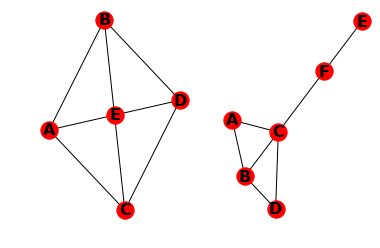

In [15]:
graph1 = { 'A':['B','C'],
          'B':['D','E'],
          'C':['D','E'],
          'D':['E'],
          'E':['A']}

graph2 = {'A': ['B', 'C'],
         'B': ['C', 'D'],
         'C': ['D'],
         'D': ['C'],
         'E': ['F'],
         'F': ['C']}

# Change graph to G in networkx
G1 = nx.Graph(graph1)
print("nodes of G1 = ", G1.nodes())
print('edges of G1 = ', G1.edges())
#nx.draw(G1)
G2 = nx.Graph(graph2)

plt.subplot(121)  #  (121) means: row=1, col=2 at first supplot
nx.draw(G1, with_labels=True, font_size=16, font_weight='bold')
plt.subplot(122)
nx.draw(G2, with_labels=True, font_size=16, font_weight='bold')
#plt.show()

## 3. Hashtable - Python dict

> Hash table stores key-value pairs but the key is generated through a hashing function.  
> Python dict represent the implementation of hash tables.  
> https://en.wikipedia.org/wiki/Hash_table  
> https://stackoverflow.com/questions/114830/is-a-python-dictionary-an-example-of-a-hash-table  
> https://dbader.org/blog/python-dictionaries-maps-and-hashtables  

In [16]:
dic = { 1.1: 'a', 4504.1: 'b' }
for k, v in dic.items():
    print('k={} with hash={}'.format(k, hash(k)))    

k=1.1 with hash=230584300921369601
k=4504.1 with hash=230584300922212760


In [17]:
# Ordered dict
import collections
d = collections.OrderedDict(One=1, Two=2, Three=3)
d['Four'] = 4
d

OrderedDict([('One', 1), ('Two', 2), ('Three', 3), ('Four', 4)])

In [18]:
# defaultdict: one way to make a graph
from collections import defaultdict
dd = defaultdict(list)
dd['A'].append('B')
dd['A'].append('C')
dd['A'].append('D')
dd

defaultdict(list, {'A': ['B', 'C', 'D']})

In [19]:
# chainmap
from collections import ChainMap
dict1 = {'A': 1, 'B': 2}
dict2 = {'C': 3, 'D': 4}
chain = ChainMap(dict1, dict2)
print('chain = ', chain)
print("chain['C'] = ", chain['C'])
#print("chain['not_existed_key'] = ", chain['not_existed_key'])

chain =  ChainMap({'A': 1, 'B': 2}, {'C': 3, 'D': 4})
chain['C'] =  3


In [20]:
# hash table
# map(hash, (0, 1, 2, 3)) # <map at 0x25123fa048>
list(map(hash, (0, 1, 2, 3)))

[0, 1, 2, 3]

In [21]:
list(map(hash, ("A", "B", "AB", "BB")))

[5751814599317588533,
 -7825015170938777119,
 6921688447168211877,
 -3957547756855123487]

In [22]:
# Just example to see how hash and dict work
dict_hash = {hash(v): v for v in ("A", "B", "AB", "BB")}
print("dict_hash = ", dict_hash)
# Now to find AB
hash_finding = hash('AB')
found = dict_hash[hash_finding]
print('found = ', found)

dict_hash =  {5751814599317588533: 'A', -7825015170938777119: 'B', 6921688447168211877: 'AB', -3957547756855123487: 'BB'}
found =  AB
